# Motivating Principal Component Analysis (PCA)

Now that we understand the concept of a projection, let's see how PCA uses it to reduce the dimensions of a dataset.

Imagine we have a 2D dataset where each point represents an observation. Reducing the dimensionality means moving these 2D points onto a 1D line. But which line should we choose?

The goal of PCA is to find the **best possible projection line**—the one that **preserves the most information** from the original dataset.

---

## The Core Idea: More Spread = More Information

How do we measure "information"? In the context of PCA, we measure it by the **variance** or "spread" of the data points after they have been projected.

* A projection that keeps the data points **spread out** has preserved a lot of the original structure and information.
* A projection that makes the data points **clump together** has lost a lot of information.

Let's visualize this. We'll start with a centered 2D dataset and project it onto several different lines to see which one is best.

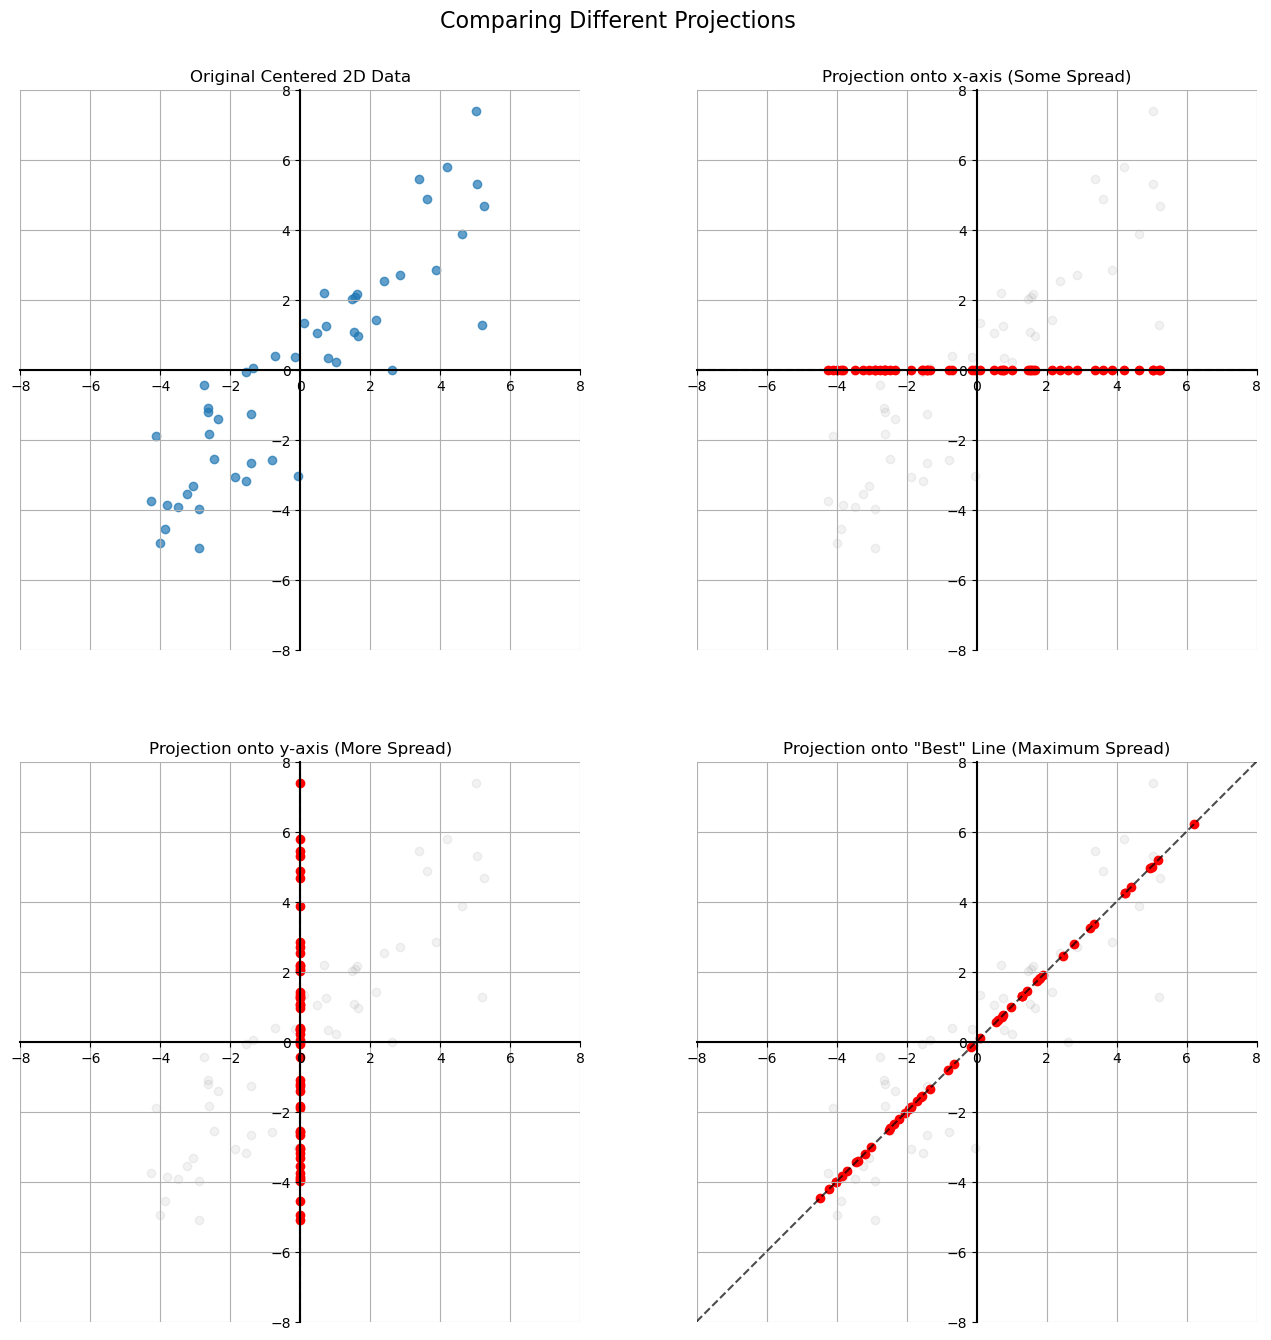

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Generate some correlated 2D data ---
np.random.seed(42)
X = np.random.rand(50, 1) * 10
Y = X.flatten() + np.random.normal(0, 1.5, 50)
data_2d = np.vstack((X.flatten(), Y)).T

# --- Center the data around the origin (a prerequisite for PCA) ---
data_centered = data_2d - np.mean(data_2d, axis=0)

# --- Define several lines (unit vectors) to project onto ---
# 1. The x-axis
proj_x_axis = np.array([1, 0])
# 2. The y-axis
proj_y_axis = np.array([0, 1])
# 3. The "best" line that captures the most variance (the principal component)
#    For this data, it's close to the line y=x.
proj_best = np.array([1, 1]) / np.linalg.norm([1, 1])

# --- Create the plot with subplots ---
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Comparing Different Projections', fontsize=16, y=0.93)

# --- Plot 1: Original Centered Data ---
axes[0, 0].scatter(data_centered[:, 0], data_centered[:, 1], alpha=0.7)
axes[0, 0].set_title('Original Centered 2D Data')

# --- Plot 2: Projection onto x-axis ---
proj_data_x = (data_centered @ proj_x_axis).reshape(-1, 1) @ proj_x_axis.reshape(1, -1)
axes[0, 1].scatter(data_centered[:, 0], data_centered[:, 1], alpha=0.1, color='gray')
axes[0, 1].scatter(proj_data_x[:, 0], proj_data_x[:, 1], c='red')
axes[0, 1].plot([-8, 8], [0, 0], 'k--', alpha=0.7)
axes[0, 1].set_title('Projection onto x-axis (Some Spread)')

# --- Plot 3: Projection onto y-axis ---
proj_data_y = (data_centered @ proj_y_axis).reshape(-1, 1) @ proj_y_axis.reshape(1, -1)
axes[1, 0].scatter(data_centered[:, 0], data_centered[:, 1], alpha=0.1, color='gray')
axes[1, 0].scatter(proj_data_y[:, 0], proj_data_y[:, 1], c='red')
axes[1, 0].plot([0, 0], [-8, 8], 'k--', alpha=0.7)
axes[1, 0].set_title('Projection onto y-axis (More Spread)')

# --- Plot 4: Projection onto the "Best" Line (PCA) ---
proj_data_best = (data_centered @ proj_best).reshape(-1, 1) @ proj_best.reshape(1, -1)
axes[1, 1].scatter(data_centered[:, 0], data_centered[:, 1], alpha=0.1, color='gray')
axes[1, 1].scatter(proj_data_best[:, 0], proj_data_best[:, 1], c='red')
axes[1, 1].plot([-8, 8], [-8, 8], 'k--', alpha=0.7)
axes[1, 1].set_title('Projection onto "Best" Line (Maximum Spread)')


# --- Format all plots ---
for ax in axes.flat:
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

---

## Summary and Goal of PCA

As the visualizations show, different projection lines result in different amounts of spread in the final 1D data. The projection onto the "best" line (the one that follows the main trend of the data) keeps the points the most spread out.

> **The goal of PCA is to find the projection that preserves the maximum possible spread (variance) in your data, even as you reduce the dimensionality.**

This process finds the "principal components"—the directions in the data that capture the most information. By projecting our data onto these components, we can reduce the number of columns in our dataset while minimizing the loss of valuable information.